# **Sales Forecasting and Demand Prediction - EDA**

#### The Sales Forecasting and Demand Prediction project aims to build a machine learning model that **predicts future sales** **and demand for products based on historical data**. Accurate forecasting helps businesses optimize inventory management, staffing, and marketing strategies. This project will apply data science techniques, from data collection and analysis to model deployment and monitoring, enabling businesses to make data-driven decisions. 

<-- Table OF Content -->

In [1]:
# Gearing up!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)

data = pd.read_csv("stores_sales_forecasting.csv",  encoding='latin1')
sales_df = pd.DataFrame(data)

sales_df.head() # test


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


## **1. Data Exploration**

### Retail dataset of a global Superstore for 4 years.

##### This [https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data] Dataset Consists of 18 Features that are Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name & Sales. 

### Understanding the Dataset Features
<table style= "width:70%; margin: auto ">
    <tr>
        <th>Feature</th>
        <th>Description</th>
    </tr>
    <tr>
        <td style="font-weight: bolder;">Sales (Target Variable)</td>
        <td>This is the total sales value for a specific order or transaction. It’s a numerical feature representing the monetary value of the products sold, These are the dollar amounts (or other currency) for individual sales transactions..</td>
    </tr>
    <tr>
        <td>Row ID</td>
        <td>A unique identifier for each row in the dataset.</td>
    </tr>
    <tr>
        <td>Order ID</td>
        <td>A unique identifier for each order.</td>
    </tr>
    <tr>
        <td>Order Date</td>
        <td>The date the order was placed. (Useful for time-series analysis.)</td>
    </tr>
    <tr>
        <td>Ship Date</td>
        <td>The date the order was shipped.</td>
    </tr>
    <tr>
        <td>Ship Mode</td>
        <td>indicates the shipping method or speed used to deliver the product to the customer. It’s a categorical variable that describes the type of shipping service (e.g., standard, expedited)..</td>
    </tr>
    <tr>
        <td>Customer ID</td>
        <td>A unique identifier for each customer.</td>
    </tr>
    <tr>
        <td>Customer Name</td>
        <td>The name of the customer.</td>
    </tr>
    <tr>
        <td>Segment</td>
        <td>The customer segment (e.g., Consumer, Corporate, Home Office).</td>
    </tr>
    <tr>
        <td>Country</td>
        <td>The country where the order was placed.</td>
    </tr>
    <tr>
        <td>City</td>
        <td>The city where the order was placed.</td>
    </tr>
    <tr>
        <td>State</td>
        <td>The state where the order was placed.</td>
    </tr>
    <tr>
        <td>Postal Code</td>
        <td>The postal code of the customer’s location.</td>
    </tr>
    <tr>
        <td>Region</td>
        <td>The region (e.g., East, West, South, Central) where the order was placed.</td>
    </tr>
    <tr>
        <td>Product ID</td>
        <td>A unique identifier for each product.</td>
    </tr>
    <tr>
        <td>Category</td>
        <td>The category of the product (e.g., Furniture, Office Supplies, Technology).</td>
    </tr>
    <tr>
        <td>Sub-Category</td>
        <td>The sub-category of the product (e.g., Chairs, Tables, Phones).</td>
    </tr>
    <tr>
        <td>Product Name</td>
        <td>The name of the product.</td>
    </tr>
</table>

### **1.1 General Feel**

In [2]:
sales_df.shape

(2121, 21)

#### 📌 11 missing values in the postal code column, all of Burlington - Vermont. we can impute using one of there codes, but the postal code column is an identfier that won't contribute to our analysis so no need the column

In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [4]:
sales_df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
sales_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [6]:
sales_df.describe(include="all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,2121.000000,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121.000000,2121,2121,2121,2121,2121,2121.000000,2121.000000,2121.000000,2121.000000
unique,NaN,1764,889,960,4,707,707,3,1,371,48,NaN,4,375,1,4,380,NaN,NaN,NaN,NaN
top,NaN,US-2015-129007,9/5/2016,12/6/2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,California,NaN,West,FUR-FU-10004270,Furniture,Furnishings,KI Adjustable-Height Table,NaN,NaN,NaN,NaN
freq,NaN,4,10,10,1248,15,15,1113,2121,192,444,NaN,707,16,2121,957,18,NaN,NaN,NaN,NaN
mean,5041.643564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55726.556341,NaN,NaN,NaN,NaN,NaN,349.834887,3.785007,0.173923,8.699327
std,2885.740258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32261.888225,NaN,NaN,NaN,NaN,NaN,503.179145,2.251620,0.181547,136.049246
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22801.000000,NaN,NaN,NaN,NaN,NaN,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60505.000000,NaN,NaN,NaN,NaN,NaN,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90032.000000,NaN,NaN,NaN,NaN,NaN,435.168000,5.000000,0.300000,33.726600


In [7]:
print("Unique Product Names:", sales_df["Product Name"].nunique())
print("Unique Product IDs:", sales_df["Product ID"].nunique())

mismatches = sales_df.groupby("Product Name")["Product ID"].nunique()
print(mismatches[mismatches > 1])


Unique Product Names: 380
Unique Product IDs: 375
Product Name
Eldon Wave Desk Accessories    2
KI Adjustable-Height Table     2
Staple-based wall hangings     2
Name: Product ID, dtype: int64


In [8]:
# no duplicates
sales_df.duplicated().sum()

0

#### 📌 The data is only based in the US

In [9]:
sales_df.Country.value_counts()

Country
United States    2121
Name: count, dtype: int64

### **1.2 Data Distrbution**

#### **1.2.1 Sales(Target) Distrbution**

##### 📌This Distrbution Suggests that there are extreme values, also the general feel emphasize this as the mean is `230.76$` while the max is `22638.48$` - Outlier analyisis is Needed

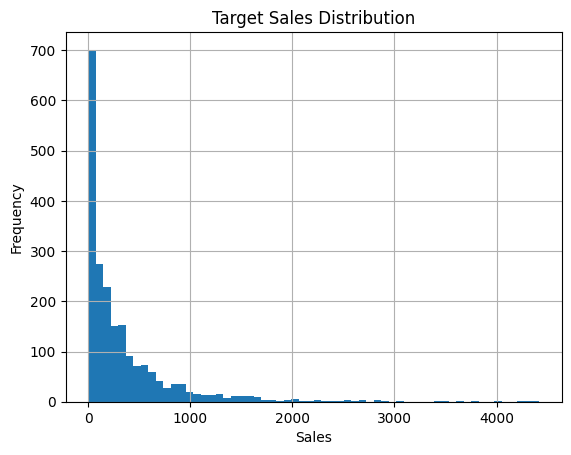

In [10]:
sales_df["Sales"].hist(bins=60)
plt.title("Target Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

#### **1.2.2 Categorical Features**

In [11]:
sales_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

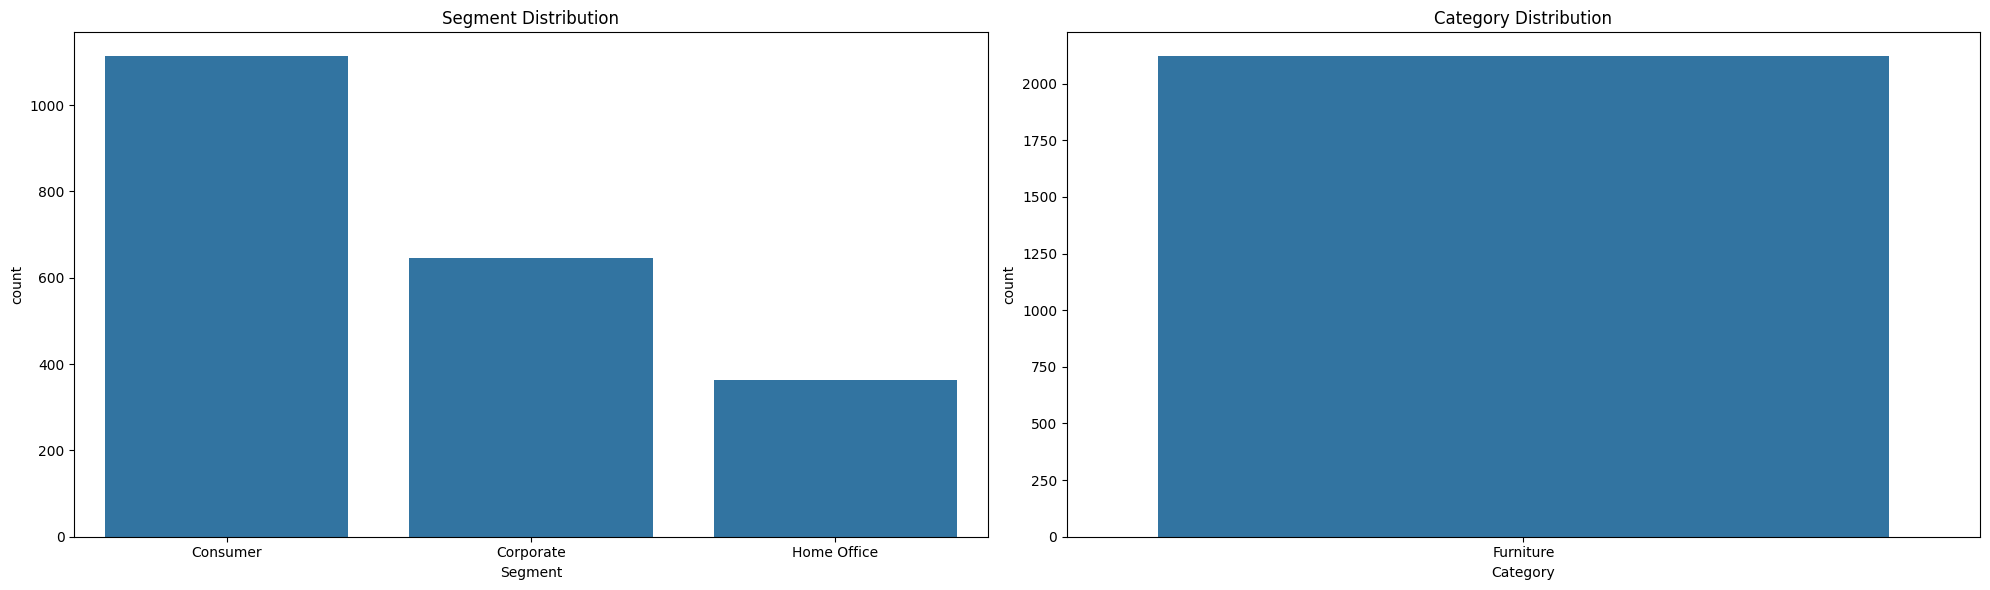

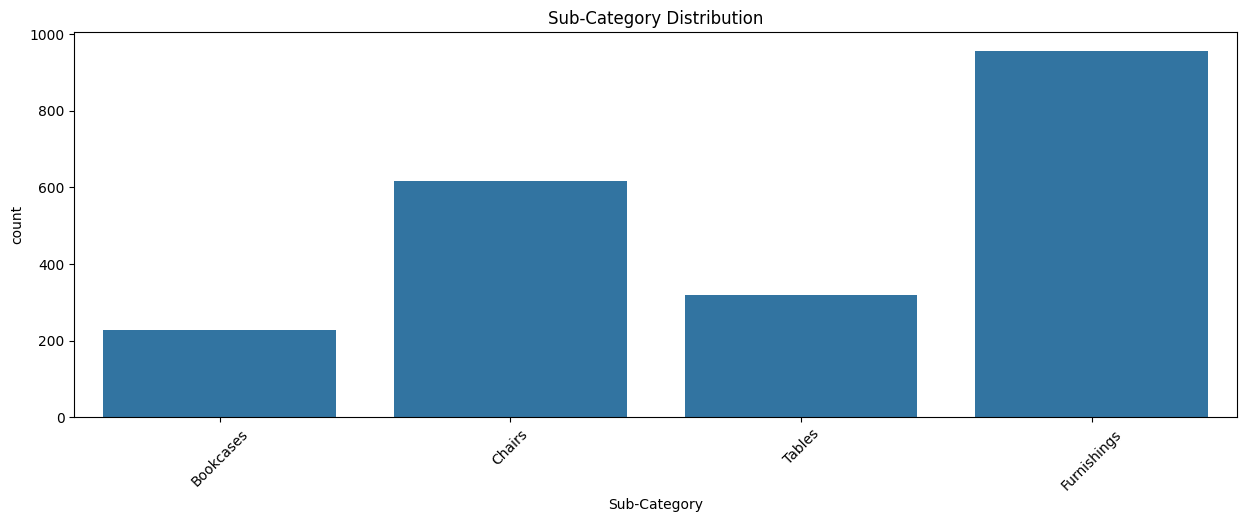

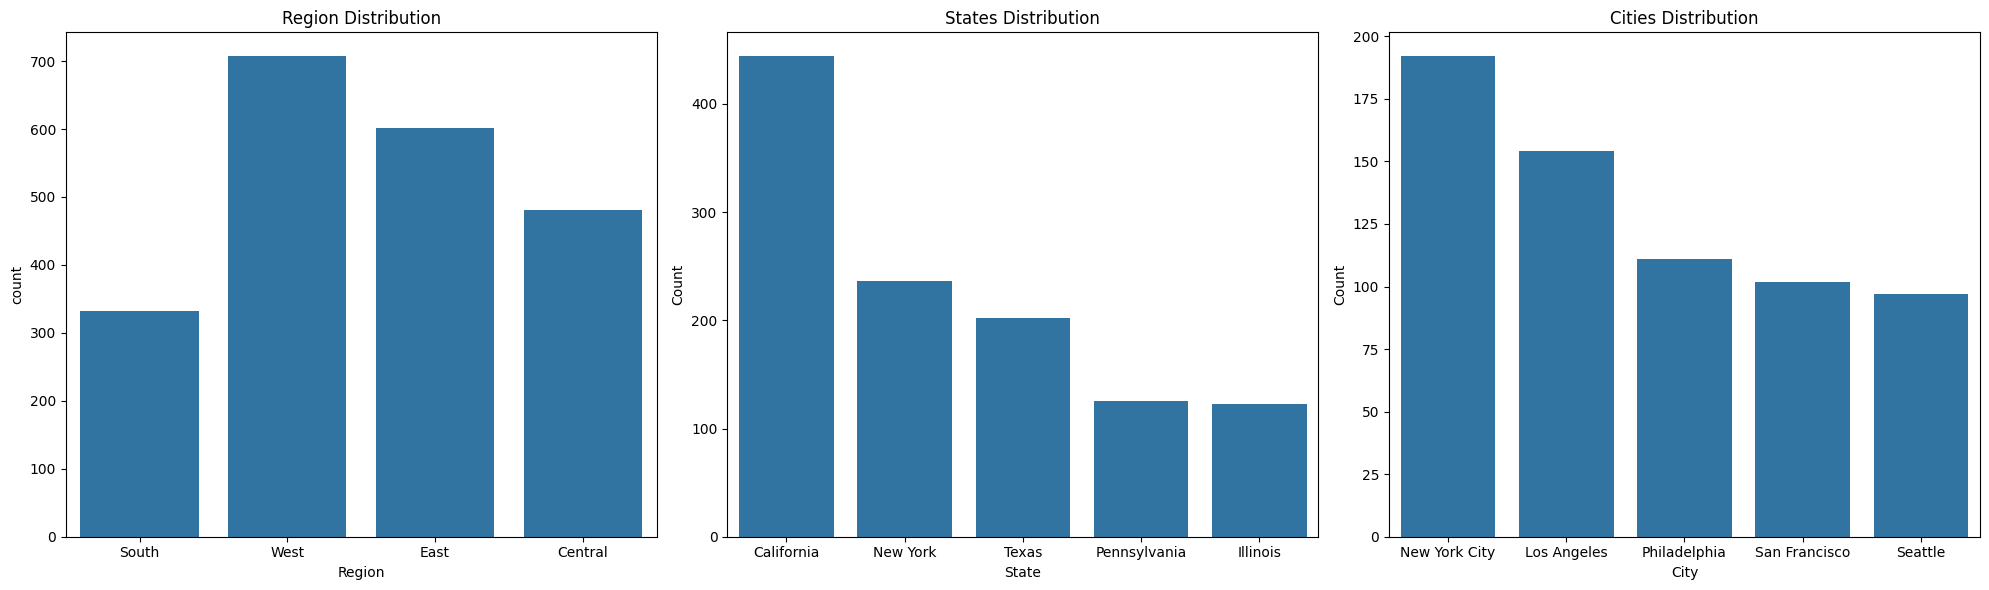

In [12]:
# Plotting categorical data using bar plots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(ax=axes[0], x='Segment', data=sales_df)
axes[0].set_title('Segment Distribution')

sns.countplot(ax=axes[1], x='Category', data=sales_df)
axes[1].set_title('Category Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(x='Sub-Category', data=sales_df)
plt.title('Sub-Category Distribution')
plt.xticks(rotation=45)
plt.show()

fig2, axes2 = plt.subplots(1, 3, figsize=(20, 6))

sns.countplot(ax=axes2[0], x='Region', data=sales_df)
axes2[0].set_title('Region Distribution')

# Create a DataFrame with the top 5 states by count
top_states = sales_df['State'].value_counts().head(5).reset_index()
top_states.columns = ['State', 'Count']

# Plot the data
sns.barplot(ax=axes2[1], x='State', y='Count', data=top_states)
axes2[1].set_title('States Distribution')

# Create a DataFrame with the top 5 cities by count
top_cities = sales_df['City'].value_counts().head(5).reset_index()
top_cities.columns = ['City', 'Count']

# Plot the data
sns.barplot(ax=axes2[2], x='City', y='Count', data=top_cities)
axes2[2].set_title('Cities Distribution')
plt.tight_layout()
plt.show()



### **1.3 Key Finidings**

#### Feature Relevance

1.Time-Based Features:

- `Order Date` and `Ship Date` can be used to create time-based features like:
     Day of the week, month, quarter, or year.

- Time between order and shipment (lead time).

2.Customer and Product Insights:

- `Customer ID`,` Segment`, and `Region` can help analyze customer behavior and preferences.

- `Category` and `Sub-Category` can help identify which products drive sales.

3.External Factors:

- `Ship Mode` can act as a proxy for shipping costs or delivery speed, which might influence sales.

- `Region` and `City` can help analyze geographical trends.

4.Target Variable:

- `Sales` is the value you’ll predict using your forecasting model.

#### To be Cleaned

**1- Columns Manipulation:**
- `Row ID`, `Order ID`, `Customer ID` & `Postal Code` are identfiers that wont contribute to our analysis. so they shoud be removed

**2- Duplicates:**
- check dups after the column manipulation as of what was observed at the general feel of 1861 id assigned to 1849 name

**3- Outliers:**
- the data contain outliers so consider conducting an Outlier Analysis and identfiy the method of handling(i recommend Scaling)

**4- New Features:**
1. **Time-Based Features (from `Order Date`)**

The `Order Date` column will be used to create features that capture trends, seasonality, and patterns in the sales data. Here’s what we’ll create:

**Date Components**
- **Year**: Extract the year from the order date.
- **Month**: Extract the month from the order date.
- **Day**: Extract the day of the month from the order date.
- **Day of Week**: Extract the day of the week (e.g., Monday = 0, Sunday = 6).
- **Week of Year**: Extract the week number of the year.
- **Quarter**: Extract the quarter of the year (e.g., Q1, Q2, Q3, Q4).

**Seasonal Features**
- **Season**: Assign seasons based on the month:
  - Winter: December, January, February
  - Spring: March, April, May
  - Summer: June, July, August
  - Fall: September, October, November
- **Holiday Flags**: Create binary flags (0 or 1) for major holidays (e.g., Christmas, Black Friday).

**Lag Features**
- **Sales from Previous Month**: Create a feature that captures the sales value from the previous month.
- **Rolling Averages**: Create features like the 3-month or 6-month rolling average of sales.

**Time Since Last Purchase**
- Calculate the time difference between consecutive orders for each customer.


2. **Categorical Variable Encoding**

Categorical variables like `Ship Mode`, `Category`, and `Region` need to be converted into numerical formats for the model to process them. Here’s how we’ll handle them:

**Label Encoding**
- Assign a unique integer to each category.
- Example: `Standard Class` = 0, `Second Class` = 1, etc.
- Use this for ordinal variables (where categories have a natural order).

**One-Hot Encoding**
- Create binary columns for each category.
- Example: `Ship Mode_Standard Class`, `Ship Mode_Second Class`, etc.
- Use this for nominal variables (where categories have no natural order).

**Target Encoding**
- Replace each category with the mean of the target variable (`Sales`).
- Example: Replace `Standard Class` with the average sales for orders with `Standard Class` shipping.
- Useful for high-cardinality categorical variables.

**Frequency Encoding**
- Replace each category with its frequency in the dataset.
- Example: If `Standard Class` appears 1000 times, replace it with 1000.



## **2. Data Cleaning**

### **2.1 Removing features that wont contribute to niether analysis nor modelling**

In [13]:
sales_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [14]:
# removing postal code as we are going to use city, region and state so it wont be useul 
# removing Country as all the data is US-based
# Removing Idetfiers that wont contribute much to the analysis
sales_df.drop(columns=["Row ID","Order ID", "Customer ID","Customer Name", "Product ID", "Postal Code", "Country",'Product Name'], inplace=True)
sales_df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [15]:
print(sales_df.isnull().sum())

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


### **2.2 Outlier Analysis**

#### Outliers Exist

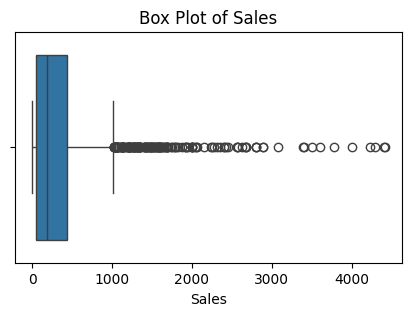

In [16]:

plt.figure(figsize=(5,3))
sns.boxplot(x = sales_df["Sales"])
plt.title(f"Box Plot of Sales")
plt.show()

#### Removing Outliers

In [17]:
# Compute Q1, Q3, and IQR
Q1 = sales_df["Sales"].quantile(0.25)
Q3 = sales_df["Sales"].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for non-outliers
non_outliers = (sales_df["Sales"] >= (Q1 - 1.5 * IQR)) & (sales_df["Sales"] <= (Q3 + 1.5 * IQR))

# Filter the DataFrame to keep only non-outliers
sales_df_cleaned = sales_df[non_outliers].copy()


In [18]:
sales_df_cleaned.shape

(1957, 13)

In [19]:
sales_df_cleaned.isnull().sum() # all zeros

Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## **3. Feature Engineering**

### **3.1 Date Transformation & Feature Extraction**

In [20]:
sales_df_cleaned["Order Date"] = pd.to_datetime(sales_df_cleaned["Order Date"], format="%m/%d/%Y", errors="coerce")
sales_df_cleaned["Ship Date"] = pd.to_datetime(sales_df_cleaned["Ship Date"], format="%m/%d/%Y", errors="coerce")

sales_df_cleaned["Shipping_Duration_Days"] = (sales_df_cleaned["Ship Date"] - sales_df_cleaned["Order Date"]).dt.days


In [21]:
sales_df_cleaned.isnull().sum() 

Order Date                0
Ship Date                 0
Ship Mode                 0
Segment                   0
City                      0
State                     0
Region                    0
Category                  0
Sub-Category              0
Sales                     0
Quantity                  0
Discount                  0
Profit                    0
Shipping_Duration_Days    0
dtype: int64

### **3.2 Extracting Temporal Features from Date Columns**

In [22]:
sales_df_cleaned["Order_Year"] = sales_df_cleaned["Order Date"].dt.year
sales_df_cleaned["Order_Month"] = sales_df_cleaned["Order Date"].dt.month
sales_df_cleaned["Order_Day"] = sales_df_cleaned["Order Date"].dt.day
sales_df_cleaned["Order_Weekday"] = sales_df_cleaned["Order Date"].dt.weekday


# Dropping original date columns as no need for that now
sales_df_cleaned.drop(columns = ["Order Date", "Ship Date"],inplace=True)

sales_df_cleaned.head()


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping_Duration_Days,Order_Year,Order_Month,Order_Day,Order_Weekday
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,3,2016,11,8,1
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,3,2016,11,8,1
2,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,7,2015,10,11,6
3,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694,5,2014,6,9,0
5,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,2,2017,7,16,6


### 2️⃣ Encoding Categorical Variables (One-Hot & Label Encoding)

#### Based on the uniqueness of each features we are going to determin the type of encoding as follows:

In [23]:
# print("Category Value Counts:\n", sales_df["Category"].value_counts())
# print("\nSub-Category Value Counts:\n", sales_df["Sub-Category"].value_counts())
# print("\nSegment Value Counts:\n", sales_df["Segment"].value_counts())
# print("\nShip Mode Value Counts:\n", sales_df["Ship Mode"].value_counts())
# print("\nRegion Value Counts:\n", sales_df["Region"].value_counts())
# print("\nState Value Counts:\n", sales_df["State"].value_counts())
# print("\nCity Value Counts:\n", sales_df["City"].value_counts())

print("###############################################################################################################")

print("Category Unique Values:\n", sales_df_cleaned["Category"].unique())
print("\nSub-Category Unique Values:\n", sales_df_cleaned["Sub-Category"].unique())
print("\nSegment Unique Values:\n", sales_df_cleaned["Segment"].unique())
print("\nShip Mode Unique Values:\n", sales_df_cleaned["Ship Mode"].unique())
print("\nRegion Unique Values:\n", sales_df_cleaned["Region"].unique())
print("\nState Unique Values:\n", sales_df_cleaned["State"].unique())
print("\nCity Unique Values:\n", sales_df_cleaned["City"].unique())


###############################################################################################################
Category Unique Values:
 ['Furniture']

Sub-Category Unique Values:
 ['Bookcases' 'Chairs' 'Tables' 'Furnishings']

Segment Unique Values:
 ['Consumer' 'Corporate' 'Home Office']

Ship Mode Unique Values:
 ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Region Unique Values:
 ['South' 'West' 'East' 'Central']

State Unique Values:
 ['Kentucky' 'Florida' 'California' 'Pennsylvania' 'Texas' 'Indiana'
 'New York' 'Illinois' 'Tennessee' 'South Carolina' 'Minnesota' 'Colorado'
 'Washington' 'Delaware' 'Ohio' 'Michigan' 'New Jersey' 'Massachusetts'
 'Mississippi' 'Arizona' 'Missouri' 'Georgia' 'Virginia' 'Utah' 'Iowa'
 'Nebraska' 'New Hampshire' 'Connecticut' 'Wisconsin' 'North Carolina'
 'Arkansas' 'Maryland' 'Louisiana' 'District of Columbia' 'Oregon'
 'Oklahoma' 'Nevada' 'Alabama' 'Rhode Island' 'Maine' 'South Dakota'
 'New Mexico' 'Idaho' 'Vermont' 'Kansas' 'Montana

#### One-Hot Encoding for `Category`, `Sub-Category`, `Segment`, `Ship Mode`, `Region`

In [24]:
one_hot_cols = ["Category", "Sub-Category", "Segment", "Ship Mode", "Region"]
sales_df_cleaned = pd.get_dummies(sales_df_cleaned, columns=one_hot_cols, drop_first=True)

sales_df_cleaned.head()

,City,State,Sales,Quantity,Discount,Profit,Shipping_Duration_Days,Order_Year,Order_Month,Order_Day,Order_Weekday,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Segment_Corporate,Segment_Home Office,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Region_East,Region_South,Region_West
0,Henderson,Kentucky,261.9600,2,0.00,41.9136,3,2016,11,8,1,False,False,False,False,False,False,True,False,False,True,False
1,Henderson,Kentucky,731.9400,3,0.00,219.5820,3,2016,11,8,1,True,False,False,False,False,False,True,False,False,True,False
2,Fort Lauderdale,Florida,957.5775,5,0.45,-383.0310,7,2015,10,11,6,False,False,True,False,False,False,False,True,False,True,False
3,Los Angeles,California,48.8600,7,0.00,14.1694,5,2014,6,9,0,False,True,False,False,False,False,False,True,False,False,True
5,Philadelphia,Pennsylvania,71.3720,2,0.30,-1.0196,2,2017,7,16,6,True,False,False,False,False,False,True,False,True,False,False


#### label encoding for `state`

In [25]:
from sklearn.preprocessing import LabelEncoder

state_encoder = LabelEncoder()
sales_df_cleaned["State_Encoded"] = state_encoder.fit_transform(sales_df_cleaned["State"])
sales_df_cleaned.drop(columns=["State"], inplace=True)

sales_df_cleaned.head()


,City,Sales,Quantity,Discount,Profit,Shipping_Duration_Days,Order_Year,Order_Month,Order_Day,Order_Weekday,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Segment_Corporate,Segment_Home Office,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Region_East,Region_South,Region_West,State_Encoded
0,Henderson,261.9600,2,0.00,41.9136,3,2016,11,8,1,False,False,False,False,False,False,True,False,False,True,False,15
1,Henderson,731.9400,3,0.00,219.5820,3,2016,11,8,1,True,False,False,False,False,False,True,False,False,True,False,15
2,Fort Lauderdale,957.5775,5,0.45,-383.0310,7,2015,10,11,6,False,False,True,False,False,False,False,True,False,True,False,8
3,Los Angeles,48.8600,7,0.00,14.1694,5,2014,6,9,0,False,True,False,False,False,False,False,True,False,False,True,3
5,Philadelphia,71.3720,2,0.30,-1.0196,2,2017,7,16,6,True,False,False,False,False,False,True,False,True,False,False,35


In [ ]:
# Get the top 10 most frequent cities
top_cities = sales_df_cleaned["City"].value_counts().nlargest(10).index

Index(['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco',
       'Seattle', 'Houston', 'Chicago', 'Columbus', 'San Diego', 'Dallas'],
      dtype='object', name='City')

#### Encoding `City` by Group Cities into Clusters or Top N

In [27]:


# Create a new column with 'Other' for non-top cities
sales_df_cleaned["City_Grouped"] = sales_df_cleaned["City"].apply(lambda x: x if x in top_cities else "Other")

# One-hot encode the new grouped city feature
sales_df_cleaned = pd.get_dummies(sales_df_cleaned, columns=["City_Grouped"], drop_first=True)

# Drop the original 'City' column to avoid redundancy
sales_df_cleaned.drop(columns=["City"], inplace=True)

sales_df_cleaned.head()



,Sales,Quantity,Discount,Profit,Shipping_Duration_Days,Order_Year,Order_Month,Order_Day,Order_Weekday,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Segment_Corporate,Segment_Home Office,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Region_East,Region_South,Region_West,State_Encoded,City_Grouped_Columbus,City_Grouped_Dallas,City_Grouped_Houston,City_Grouped_Los Angeles,City_Grouped_New York City,City_Grouped_Other,City_Grouped_Philadelphia,City_Grouped_San Diego,City_Grouped_San Francisco,City_Grouped_Seattle
0,261.9600,2,0.00,41.9136,3,2016,11,8,1,False,False,False,False,False,False,True,False,False,True,False,15,False,False,False,False,False,True,False,False,False,False
1,731.9400,3,0.00,219.5820,3,2016,11,8,1,True,False,False,False,False,False,True,False,False,True,False,15,False,False,False,False,False,True,False,False,False,False
2,957.5775,5,0.45,-383.0310,7,2015,10,11,6,False,False,True,False,False,False,False,True,False,True,False,8,False,False,False,False,False,True,False,False,False,False
3,48.8600,7,0.00,14.1694,5,2014,6,9,0,False,True,False,False,False,False,False,True,False,False,True,3,False,False,False,True,False,False,False,False,False,False
5,71.3720,2,0.30,-1.0196,2,2017,7,16,6,True,False,False,False,False,False,True,False,True,False,False,35,False,False,False,False,False,False,True,False,False,False


In [27]:
sales_df_cleaned.head()

,Sales,Quantity,Discount,Profit,Shipping_Duration_Days,Order_Year,Order_Month,Order_Day,Order_Weekday,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Segment_Corporate,Segment_Home Office,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Region_East,Region_South,Region_West,State_Encoded,City_Grouped_Columbus,City_Grouped_Dallas,City_Grouped_Houston,City_Grouped_Los Angeles,City_Grouped_New York City,City_Grouped_Other,City_Grouped_Philadelphia,City_Grouped_San Diego,City_Grouped_San Francisco,City_Grouped_Seattle
0,261.9600,2,0.00,41.9136,3,2016,11,8,1,False,False,False,False,False,False,True,False,False,True,False,15,False,False,False,False,False,True,False,False,False,False
1,731.9400,3,0.00,219.5820,3,2016,11,8,1,True,False,False,False,False,False,True,False,False,True,False,15,False,False,False,False,False,True,False,False,False,False
2,957.5775,5,0.45,-383.0310,7,2015,10,11,6,False,False,True,False,False,False,False,True,False,True,False,8,False,False,False,False,False,True,False,False,False,False
3,48.8600,7,0.00,14.1694,5,2014,6,9,0,False,True,False,False,False,False,False,True,False,False,True,3,False,False,False,True,False,False,False,False,False,False
5,71.3720,2,0.30,-1.0196,2,2017,7,16,6,True,False,False,False,False,False,True,False,True,False,False,35,False,False,False,False,False,False,True,False,False,False


### Saving the Cleaned Dataset


In [28]:
sales_df_cleaned.to_csv('encoded_NewData.csv', index=False)

### 6️⃣ Aggregation: Sales Performance per Product - Analysis DATA

In [29]:
sales_df["Sales_per_Product"] = sales_df.groupby("Product Name")["Sales"].transform("mean")

KeyError: 'Product Name'

## 📊 **4. Exploratory Data Analysis (EDA) on SuperStore Sales**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("SuperStoreSales.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'SuperStoreSales.csv'

## 1️⃣ What are the number of unique orders and customers?
This section explores the distinct counts of orders and customers in the dataset.

C:\Users\Click\AppData\Local\Temp\ipykernel_2144\4291362087.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=["Unique Orders", "Unique Customers"], y=[unique_orders, unique_customers], palette="viridis")


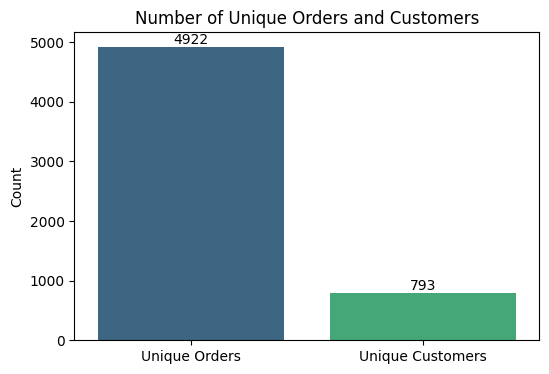

In [ ]:
def plot_unique_counts(df):
    unique_orders = df["Order ID"].nunique()
    unique_customers = df["Customer ID"].nunique()

    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=["Unique Orders", "Unique Customers"], y=[unique_orders, unique_customers], palette="viridis")
    plt.title("Number of Unique Orders and Customers")
    plt.ylabel("Count")

    # Annotate the bars with their exact values
    for i, value in enumerate([unique_orders, unique_customers]):
        ax.text(i, value + 0.00000005 * value, f'{value}', ha='center', va='bottom')

    plt.show()

plot_unique_counts(df)

## 2️⃣ How is the distribution of shipping modes?
Analyzing the different shipping modes used in the dataset.

C:\Users\Click\AppData\Local\Temp\ipykernel_2144\1931415966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=df["Ship Mode"], order=df["Ship Mode"].value_counts().index, palette="coolwarm")


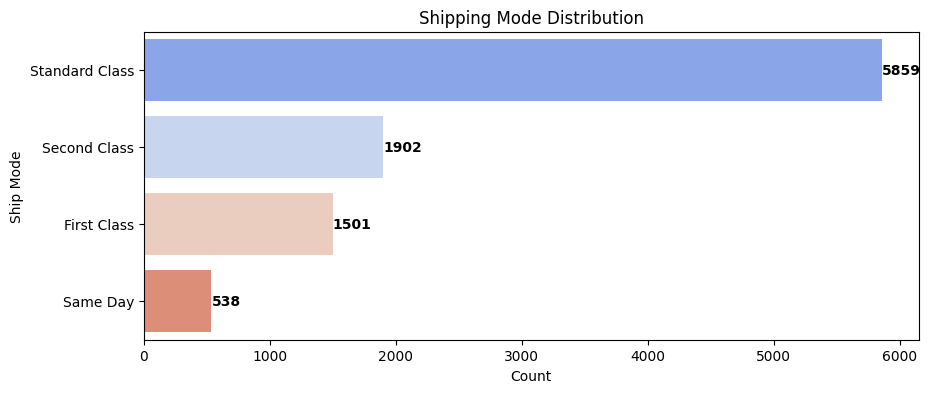

In [ ]:
def plot_shipping_modes(df):
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(y=df["Ship Mode"], order=df["Ship Mode"].value_counts().index, palette="coolwarm")
    plt.title("Shipping Mode Distribution")
    plt.xlabel("Count")
    plt.ylabel("Ship Mode")
    
    # Labeling the counts on the bars with adjusted position after the column
    for p in ax.patches:
        ax.text(p.get_width() + 0.5, p.get_y() + p.get_height() / 2,  # Increase the 0.5 value for more spacing
                f'{int(p.get_width())}', ha='left', va='center', color='black', fontweight='bold')
    
    plt.show()

plot_shipping_modes(df)


## 3️⃣ What are the most and least common categories & sub-categories?
Identifying the most and least frequently occurring product categories and sub-categories.

In [30]:

def plot_category_distribution(df):
    # Plot for Category distribution
    plt.figure(figsize=(7, 5))
    ax1 = sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="magma")
    plt.title("Product Category Distribution")
    plt.xlabel("Count")
    plt.ylabel("Category")

    # Annotate the bars with their exact values for Category
    # for p in ax1.patches:
    #     width = p.get_width()
    #     ax1.text(width + 0.2, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center')

    plt.show()

    # Plot for Sub-Category distribution
    plt.figure(figsize=(8, 5))
    ax2 = sns.countplot(y=df["Sub-Category"], order=df["Sub-Category"].value_counts().index, palette="coolwarm")
    plt.title("Product Sub-Category Distribution")
    plt.xlabel("Count")
    plt.ylabel("Sub-Category")

    # Annotate the bars with their exact values for Sub-Category
    for p in ax2.patches:
        width = p.get_width()
        ax2.text(width + 0.11, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center')

    plt.show()

plot_category_distribution(df)

NameError: name 'df' is not defined

## 4️⃣ Which categories generate the highest and lowest total sales?
Comparing product categories based on total revenue to determine top and bottom performers.

In [31]:
def plot_category_sales(df):
    category_sales = df.groupby("Category")["Sales"].sum().sort_values()

    plt.figure(figsize=(8, 5))
    ax = sns.barplot(y=category_sales.index, x=category_sales.values, palette="Blues_r")
    plt.title("Total Sales by Category")
    plt.xlabel("Total Sales")
    plt.ylabel("Category")
    
    # Commenting out the code that adds labels to the bars
    # for p in ax.patches:
    #     ax.text(p.get_width() + 2000, p.get_y() + p.get_height() / 2,  # Adjust label position
    #             f'{int(p.get_width())}', ha='left', va='center', color='black', fontweight='bold')
    
    plt.show()

plot_category_sales(df)

NameError: name 'df' is not defined

## 5️⃣ What are the Top 10 Products by Average Sales?
Identifying the highest-selling products and those that contribute the least to profitability.

In [32]:
def plot_product_performance(df):
    product_sales = df.groupby("Product Name")["Sales"].mean().sort_values(ascending=False).head(10)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(y=product_sales.index, x=product_sales.values, palette="Blues_r")
    plt.title("Top 10 Products by Average Sales")
    plt.xlabel("Average Sales")
    plt.ylabel("Product Name")
    
    # Adding labels to the bars
    # for p in ax.patches:
    #     ax.text(p.get_width() + 50, p.get_y() + p.get_height() / 2,  # Adjust label position
    #             f'{p.get_width():.2f}', ha='left', va='center', color='black', fontweight='bold')
    
    plt.show()

plot_product_performance(df)


NameError: name 'df' is not defined

## 6️⃣ Who are the top customers contributing the most to total sales?
Examining the highest-spending customers and their impact on overall revenue.

In [33]:
def plot_top_customers(df):
    top_customers = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(16, 6))
    ax = sns.barplot(y=top_customers.index, x=top_customers.values, palette="Oranges_r")
    plt.title("Top 10 Customers by Total Sales")
    plt.xlabel("Total Sales")
    plt.ylabel("Customer Name")
    
    # Adding labels to the bars
    for p in ax.patches:
        ax.text(p.get_width() + 150, p.get_y() + p.get_height() / 2,  # Adjust label position
                f'{p.get_width():,.0f}', ha='left', va='center', color='black', fontweight='bold')
    
    plt.show()

plot_top_customers(df)

NameError: name 'df' is not defined

## 7️⃣ How does the average order value vary across customer segments?
Exploring how different customer segments influence the average order value.

In [34]:
def plot_segment_avg_order(df):
    avg_sales_segment = df.groupby("Segment")["Sales"].mean()

    plt.figure(figsize=(10, 4))
    ax = sns.barplot(y=avg_sales_segment.index, x=avg_sales_segment.values, palette="coolwarm")
    plt.title("Average Order Value by Segment")
    plt.xlabel("Average Sales")
    plt.ylabel("Segment")
    
    # Adding labels to the bars
    # for p in ax.patches:
    #     ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2,  # Adjust label position
    #             f'{p.get_width():,.2f}', ha='left', va='center', color='black', fontweight='bold')
    
    plt.show()

plot_segment_avg_order(df)


NameError: name 'df' is not defined

## 8️⃣ Which states and cities are the most profitable?
Investigating regional trends to determine the most and least profitable locations.

In [35]:
def plot_sales_by_location(df):
    state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(15, 6))
    ax = sns.barplot(y=state_sales.index, x=state_sales.values, palette="Blues_r")
    plt.title("Top 10 States by Total Sales")
    plt.xlabel("Total Sales")
    plt.ylabel("State")
    
    # Adding labels to the bars
    for p in ax.patches:
        ax.text(p.get_width() + 200, p.get_y() + p.get_height() / 2,  # Adjust label position
                f'{p.get_width():,.0f}', ha='left', va='center', color='black', fontweight='bold')
    
    plt.show()

plot_sales_by_location(df)

NameError: name 'df' is not defined

## 9️⃣ What are the sales trends over time?
Analyzing sales trends over different time periods.

In [36]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%Y-%m-%d')

# Extract year and month for monthly trend analysis
df['Year-Month'] = df['Order Date'].dt.to_period('M')

# Aggregate sales by month
df_monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()

# Convert 'Year-Month' back to datetime for plotting
df_monthly_sales['Year-Month'] = df_monthly_sales['Year-Month'].astype(str)
df_monthly_sales['Year-Month'] = pd.to_datetime(df_monthly_sales['Year-Month'])

# Plot monthly sales trend
plt.figure(figsize=(8, 5))
plt.plot(df_monthly_sales['Year-Month'], df_monthly_sales['Sales'], marker='o', linestyle='-', color='green', alpha=0.8)
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


NameError: name 'df' is not defined

## 🔟 What are the yearly sales trends?
Examining the sales trends on a yearly basis.

In [37]:

# # Ensure 'Order Date' is in datetime format
# df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# # Drop NaN values in 'Order Date' if any
# df = df.dropna(subset=['Order Date'])

# Extract Year
df['Year'] = df['Order Date'].dt.year

# Group by Year and Sum Sales
df_yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=df_yearly_sales['Year'].astype(str), y=df_yearly_sales['Sales'], palette='viridis')
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales Trend")

# Adding labels to bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 1,  
            f'{p.get_height():,.0f}', ha='center', va='bottom', 
            color='black', fontweight='bold')

plt.show()


NameError: name 'df' is not defined

## 1️⃣1️⃣ What are the sales trends by day of the week?
Analyzing sales trends across different days of the week.

In [38]:
df['Day of Week'] = df['Order Date'].dt.day_name()
df_day_sales = df.groupby('Day of Week')['Sales'].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_day_sales['Day of Week'], y=df_day_sales['Sales'], palette='coolwarm')

plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.title("Sales Trend by Day of the Week")

# Adding labels on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 500,  # Adjust label position
            f'{p.get_height():,.0f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()



NameError: name 'df' is not defined

## 1️⃣2️⃣ What are the monthly sales trends?
Analyzing sales trends across different months.

In [39]:


# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract Month
df['Month'] = df['Order Date'].dt.month

# Group by Month and Sum Sales
df_month_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df_month_sales['Month'], y=df_month_sales['Sales'], palette='coolwarm')

# Customizing labels
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales Seasonality - Monthly Sales Trend")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adding count labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 500,  # Adjust position slightly above the bar
            f'{p.get_height():,.0f}', ha='center', va='bottom', 
            color='black', fontweight='bold')

plt.show()


NameError: name 'df' is not defined

## 1️⃣3️⃣ What is the sales heatmap by day and month?
Visualizing sales data in a heatmap format by day and month.

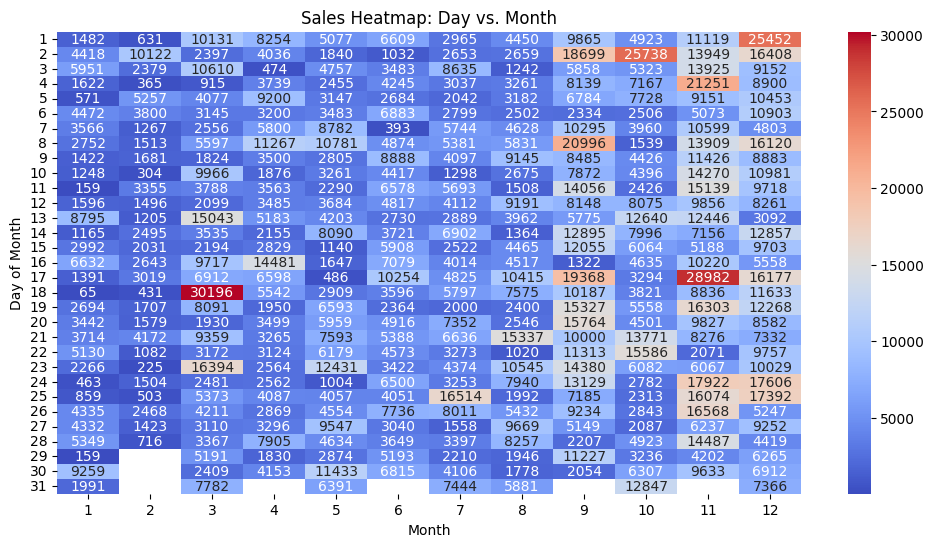

In [ ]:
df['Day'] = df['Order Date'].dt.day
heatmap_data = df.pivot_table(values='Sales', index='Day', columns='Month', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")
plt.xlabel("Month")
plt.ylabel("Day of Month")
plt.title("Sales Heatmap: Day vs. Month")
plt.show()


## 1️⃣4️⃣ What are the yearly sales trends by category?
Analyzing sales trends for each category over the years.

In [40]:


# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract year from Order Date
df['Year'] = df['Order Date'].dt.year

# Aggregate sales by Year and Category
df_category_sales = df.groupby(['Year', 'Category'])['Sales'].sum().reset_index()

# Identify the top-selling category each year
top_category_per_year = df_category_sales.loc[df_category_sales.groupby('Year')['Sales'].idxmax()]

# Display results
print("Top-Selling Category Each Year:")
print(top_category_per_year)

# Plot sales trends for each category over the years
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Sales', hue='Category', data=df_category_sales, palette='viridis')

plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales by Category")
plt.legend(title="Category")

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2000,  # Adjust position
            f'{p.get_height():,.0f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()


NameError: name 'df' is not defined

## 1️⃣5️⃣ What is the sales distribution by segment over the years?
Analyzing the sales distribution by segment for each year.


In [41]:


# Extract Year from Order Date
df['Year'] = df['Order Date'].dt.year

# Get unique years sorted
years = sorted(df['Year'].unique())

# Create subplots: Two pie charts per row
rows = (len(years) + 1) // 2  # Define the number of rows needed
fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 5))

# Flatten axes for easier iteration (handles odd numbers of years)
axes = axes.flatten()

# Loop through each year and create a pie chart
for i, year in enumerate(years):
    df_year = df[df['Year'] == year].groupby('Segment')['Sales'].sum()
    
    axes[i].pie(df_year, labels=df_year.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
    axes[i].set_title(f"Sales Distribution by Segment - {year}")

# Hide any extra subplots if odd number of years
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

## 1️⃣6️⃣ Sales by City (Top 10 Cities)

In [42]:
sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index()

top_10_sales_by_city = sales_by_city.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_sales_by_city['Sales'], labels=top_10_sales_by_city['City'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales by City (Top 10)')
plt.show()

NameError: name 'df' is not defined

## 1️⃣7️⃣ Total sales by city (Top 10)

In [43]:
sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False).reset_index()
top_10_sales_by_city = sales_by_city.head(10)

sns.set_theme(style="white", palette="muted")

fig, ax = plt.subplots(figsize=(10, 8))

colors = sns.color_palette("Set2", len(top_10_sales_by_city))

explode = [0.1] * len(top_10_sales_by_city)

wedges, texts, autotexts = ax.pie(
    top_10_sales_by_city['Sales'], 
    labels=top_10_sales_by_city['City'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

plt.title('Total Sales by City (Top 10)', fontsize=16, fontweight='bold', color='darkblue')

plt.axis('equal')

plt.show()

NameError: name 'df' is not defined

## 1️⃣8️⃣ Total sales by region

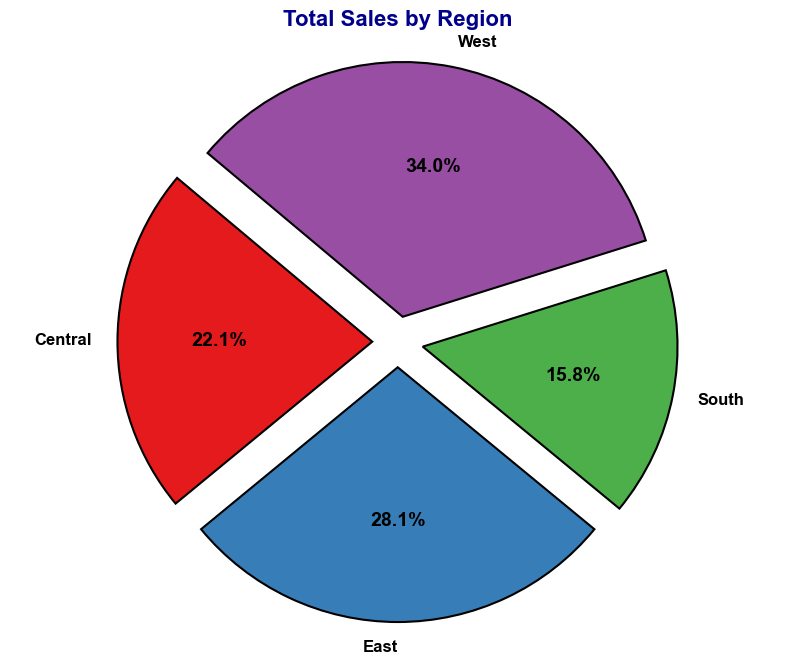

In [44]:
sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()
sns.set_theme(style="white", palette="muted")
fig, ax = plt.subplots(figsize=(10, 8))
colors = sns.color_palette("Set1", len(sales_by_region))

explode = [0.1] * len(sales_by_region)

wedges, texts, autotexts = ax.pie(
    sales_by_region['Sales'], 
    labels=sales_by_region['Region'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

plt.title('Total Sales by Region', fontsize=16, fontweight='bold', color='darkblue')

plt.axis('equal')

plt.show()

## 1️⃣9️⃣ State vs Count

In [45]:
plt.figure(figsize=(11,8))
sns.countplot(x=df['State'])
plt.xlabel('State',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('State vs Count',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'df' is not defined

<Figure size 1100x800 with 0 Axes>

## Sub category vs count

In [46]:
plt.figure(figsize=(12,9))
sns.countplot(x=df['Sub-Category'])
plt.xlabel('Sub-Category',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Sub-Category vs Count',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

NameError: name 'df' is not defined

<Figure size 1200x900 with 0 Axes>

## Sales of the Top 15 States

In [47]:
top_states=df.groupby(['State']).sum('Sales').sort_values('Sales',ascending=False).head(5)
top_states=top_states[['Sales']].round(2)
top_states.reset_index(inplace=True)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='State', y='Sales', data=top_states, palette='viridis')
plt.title('Top 5 States by Sales')
plt.xlabel('State')
plt.ylabel('Sales')

# Adding labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 5000,  # Adjust position
            f'{p.get_height():,.2f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

NameError: name 'df' is not defined

## Top 30 Most Order Date	 Sales Values

In [48]:
top_100_OrderDate = df.groupby('Order Date')['Sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(25, 15))
top_100_OrderDate.plot(kind='pie', autopct="%1.1f%%")
plt.title("Top 100 Most Order Date Sales Values")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

NameError: name 'df' is not defined

## Total sales by U.S state

In [49]:
import plotly.graph_objects as go

state_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

df['State'] = df['State'].str.strip()  
df['Abbreviation'] = df['State'].map(state_abbrev)

sum_of_sales = df.groupby('State', as_index=False)['Sales'].sum()

sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(state_abbrev)

missing_states = sum_of_sales[sum_of_sales['Abbreviation'].isna()]
if not missing_states.empty:
    print( missing_states['State'].tolist())

fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],  
    locationmode='USA-states',
    z=sum_of_sales['Sales'],  
    hoverinfo='location+z',
    showscale=True
))

fig.update_geos(projection_type="albers usa")

fig.update_layout(
    geo_scope='usa',
    title_text='Total Sales by U.S. State',
    title_x=0.5,  
    margin=dict(l=0, r=0, t=50, b=0)  
)

fig.show()

ModuleNotFoundError: No module named 'plotly'

## **5. Modelling**

## Normal Scale

In [55]:
encoded_sales_df = pd.read_csv("encoded_NewData.csv")

encoded_sales_df.head()
# encoded_sales_df["Log_Sales"] = np.log1p(encoded_sales_df["Sales"])
# encoded_sales_df.drop(columns=["Sales"], inplace=True)  # remove normal sales values

,Sales,Quantity,Discount,Profit,Shipping_Duration_Days,Order_Year,Order_Month,Order_Day,Order_Weekday,Sub-Category_Chairs,Sub-Category_Furnishings,Sub-Category_Tables,Segment_Corporate,Segment_Home Office,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Region_East,Region_South,Region_West,State_Encoded,City_Grouped_Columbus,City_Grouped_Dallas,City_Grouped_Houston,City_Grouped_Los Angeles,City_Grouped_New York City,City_Grouped_Other,City_Grouped_Philadelphia,City_Grouped_San Diego,City_Grouped_San Francisco,City_Grouped_Seattle
0,261.9600,2,0.00,41.9136,3,2016,11,8,1,False,False,False,False,False,False,True,False,False,True,False,15,False,False,False,False,False,True,False,False,False,False
1,731.9400,3,0.00,219.5820,3,2016,11,8,1,True,False,False,False,False,False,True,False,False,True,False,15,False,False,False,False,False,True,False,False,False,False
2,957.5775,5,0.45,-383.0310,7,2015,10,11,6,False,False,True,False,False,False,False,True,False,True,False,8,False,False,False,False,False,True,False,False,False,False
3,48.8600,7,0.00,14.1694,5,2014,6,9,0,False,True,False,False,False,False,False,True,False,False,True,3,False,False,False,True,False,False,False,False,False,False
4,71.3720,2,0.30,-1.0196,2,2017,7,16,6,True,False,False,False,False,False,True,False,True,False,False,35,False,False,False,False,False,False,True,False,False,False


### **5.1 Data Splitting**

In [56]:
from sklearn.model_selection import train_test_split
# Statistical Analysis
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import pickle

# data splitting

# Define features and target variable
X = encoded_sales_df.drop(columns=["Sales"])  # Features
y = encoded_sales_df["Sales"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1565, 30)
Testing set size: (392, 30)


### **5.1 Linear Regression**

In [57]:
# Initialize the results dataframe
results_df = pd.DataFrame(columns=['Model', 'RMSLE', 'RMSE', 'MSE', 'MAE'])

In [58]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Calculate metrics
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)

# Apply the absolute value function to both y_test and lr_predictions
y_test_abs = abs(y_test)
lr_predictions_abs = abs(lr_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
lr_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, lr_predictions_abs))

# Create a DataFrame to store results for Linear Regression
results_lr = pd.DataFrame({'Model': ['Linear Regression'],
                            'RMSLE': [lr_rmsle],
                            'RMSE': [np.sqrt(lr_mse)],
                            'MSE': [lr_mse],
                            'MAE': [lr_mae]}).round(2)

# Print the results_lr dataframe
print(results_lr)

print("___________________________________________________________")

print(lr_model.score(X_train,y_train))
print(lr_model.score(X_test,y_test))

               Model  RMSLE   RMSE       MSE     MAE
0  Linear Regression    1.0  179.2  32111.44  129.65
___________________________________________________________
0.478502580503568
0.42719543480133493


### **5.2 Descion Tree Regressor**

In [59]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
dt_predictions = dt_model.predict(X_test)

# Calculate metrics
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_mae = mean_absolute_error(y_test, dt_predictions)

# Apply the absolute value function to both y_test and dt_predictions
y_test_abs = abs(y_test)
dt_predictions_abs = abs(dt_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
dt_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, dt_predictions_abs))

# Create a DataFrame to store results for Decision Tree Regressor
results_dt = pd.DataFrame({'Model': ['Decision Tree Regressor'],
                            'RMSLE': [dt_rmsle],
                            'RMSE': [np.sqrt(dt_mse)],
                            'MSE': [dt_mse],
                            'MAE': [dt_mae]}).round(2)

# Print the results
print(results_dt)

print("___________________________________________________________")

print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

                     Model  RMSLE    RMSE       MSE     MAE
0  Decision Tree Regressor   0.62  165.25  27307.89  101.26
___________________________________________________________
1.0
0.5128812697692107


### **5.2 Random Forest**

In [60]:
# Random Forest Regression Model
# rf_model = RandomForestRegressor(n_estimators=20, random_state=42)  # بلاش 100 عشان ال اوفر فيتتينج الداتا صغيرة فشخ
rf_model = RandomForestRegressor(n_estimators=100,
    max_depth=None,  # try 5-10
    min_samples_leaf=5,
    random_state=42)  # بلاش 100 عشان ال اوفر فيتتينج الداتا صغيرة فشخ

rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Calculate metrics
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)

# Apply the absolute value function to both y_test and rf_predictions
y_test_abs = abs(y_test)
rf_predictions_abs = abs(rf_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
rf_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, rf_predictions_abs))

# Create a DataFrame to store results for Random Forest
results_rf = pd.DataFrame({'Model': ['Random Forest'],
                            'RMSLE': [rf_rmsle],
                            'RMSE': [np.sqrt(rf_mse)],
                            'MSE': [rf_mse],
                            'MAE': [rf_mae]}).round(2)


# Print the results_rf dataframe
print(results_rf)
print("___________________________________________________________")

print(rf_model.score(X_train,y_train))
print(rf_model.score(X_test,y_test))
import matplotlib.pyplot as plt
# pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False).head(15).plot(kind='barh')

# Calculate and print the mean of y_test
mean_y_test = y_test.mean()
print(f"Mean of y_test: {mean_y_test:.2f}")

# Compare RMSE with the mean of y_test
rf_rmse = np.sqrt(rf_mse)
# print(f"RMSE as a percentage of mean of y_test: {(rf_rmse / mean_y_test) * 100:.2f}%")


           Model  RMSLE    RMSE       MSE    MAE
0  Random Forest   0.54  127.42  16235.72  79.87
___________________________________________________________
0.8842094796425436
0.7103868725456447
Mean of y_test: 241.83


### **5.4 XGBoosting**

In [62]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import numpy as np

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_predictions = xgb_model.predict(X_test)

# Calculate metrics
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

# Apply the absolute value function to both y_test and xgb_predictions
xgb_predictions_abs = abs(xgb_predictions)
xgb_rmsle = np.sqrt(mean_squared_log_error(y_test_abs, xgb_predictions_abs))

# Create a DataFrame to store results for XGBoost
results_xgb = pd.DataFrame({'Model': ['XGBoost'],
                            'RMSLE': [xgb_rmsle],
                            'RMSE': [np.sqrt(xgb_mse)],
                            'MSE': [xgb_mse],
                            'MAE': [xgb_mae]}).round(2)

# Print the results
print(results_xgb)

# Add the results to the overall results DataFrame
print(xgb_model.score(X_train,y_train))
print(xgb_model.score(X_test,y_test))


     Model  RMSLE    RMSE       MSE    MAE
0  XGBoost   0.55  128.84  16599.59  80.31
0.9708066277362647
0.7038961249358975


## **Cross Validation**

In [63]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import numpy as np
import pandas as pd

def evaluate_model(model, X, y, model_name):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    predictions = cross_val_predict(model, X, y, cv=kf)

    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, predictions)
    
    y_abs = np.abs(y)
    pred_abs = np.abs(predictions)
    rmsle = np.sqrt(mean_squared_log_error(y_abs, pred_abs))

    return {
        'Model': model_name,
        'RMSLE': round(rmsle, 3),
        'RMSE': round(rmse, 3),
        'MSE': round(mse, 3),
        'MAE': round(mae, 3)
    }





from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = [
    (lr_model, "Linear Regression"),
    (dt_model, "Decision Tree Regressor"),
    (rf_model, "Random Forest")
]

results = []

for model, name in models:
    result = evaluate_model(model, X, y, name)
    results.append(result)

results_df = pd.DataFrame(results)
print(results_df)

                     Model  RMSLE     RMSE        MSE      MAE
0        Linear Regression  0.999  178.697  31932.487  130.277
1  Decision Tree Regressor  0.619  158.045  24978.293   94.348
2            Random Forest  0.515  119.429  14263.239   75.771


## Log scale

In [ ]:
encoded_sales_df = pd.read_csv("encoded_NewData.csv")

encoded_sales_df.head()
# encoded_sales_df["Log_Sales"] = np.log1p(encoded_sales_df["Sales"])
# encoded_sales_df.drop(columns=["Sales"], inplace=True)  # remove normal sales values

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\DEPI\\Technical\\DEPI\\Graduation_Project\\Sales-Forecasting-and-Demand-Prediction\\Milestones\\M1\\encoded_NewData.csv'

In [ ]:
# Define features and target variable
X = encoded_sales_df.drop(columns=["Sales"])  # Features
y = encoded_sales_df["Sales"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1565, 30)
Testing set size: (392, 30)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
import numpy as np
import pandas as pd

# ----- 1. Apply log1p transformation to y_train and y_test -----
y_train_log = np.log1p(y_train)   # log(1 + y)
y_test_log = np.log1p(y_test)

# ----- 2. Train the XGBoost Regressor on log-transformed target -----
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train_log)

# ----- 3. Predict on the test data (in log scale) -----
y_pred_log = xgb_model.predict(X_test)

# ----- 4. Inverse the transformation to get real-scale predictions -----
y_pred = np.expm1(y_pred_log)  # inverse of log1p
y_test_real = np.expm1(y_test_log)

# ----- 5. Evaluate model performance -----
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmsle = np.sqrt(mean_squared_log_error(y_test, np.maximum(0, y_pred)))  # clamp negatives if any

# ----- 6. Print results -----
results_xgb = pd.DataFrame({
    'Model': ['XGBoost (Log Target)'],
    'RMSLE': [xgb_rmsle],
    'RMSE': [xgb_rmse],
    'MSE': [xgb_mse],
    'MAE': [xgb_mae]
}).round(2)

print(results_xgb)

# ----- 7. R² Scores -----
print("Train R²:", xgb_model.score(X_train, y_train_log))  # still log-scale
print("Test R²:", xgb_model.score(X_test, y_test_log))


                  Model  RMSLE   RMSE       MSE    MAE
0  XGBoost (Log Target)   0.48  132.2  17477.38  77.32
Train R²: 0.9713608215740697
Test R²: 0.8740284786794396
